In [ ]:
# Data Analysis & Data Wrangling
import numpy as np
import pandas as pd


import scipy.stats as stats


# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Filtering warning message
from warnings import filterwarnings
filterwarnings("ignore")

from sklearn.neural_network import MLPClassifier

***1.1 Read the data and do exploratory data analysis (3 pts). Describe the data briefly. Interpret the inferences for each (3 pts). Initial steps like head() .info(), Data Types, etc . Null value check. Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Summary stats, Skewness, Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct***


In [ ]:
## Importing the datatset
df=pd.read_csv("/content/bank_marketing_part1_Data.csv")

In [ ]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [ ]:
df.shape

(210, 7)

In [ ]:
df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [ ]:
df.value_counts()

spending  advance_payments  probability_of_full_payment  current_balance  credit_limit  min_payment_amt  max_spent_in_single_shopping
10.59     12.41             0.8648                       4.899            2.787         4.975            4.794                           1
17.32     15.91             0.8599                       6.064            3.403         3.824            5.922                           1
15.57     15.15             0.8527                       5.920            3.231         2.640            5.879                           1
15.60     15.11             0.8580                       5.832            3.286         2.725            5.752                           1
15.69     14.75             0.9058                       5.527            3.514         1.599            5.046                           1
                                                                                                                                        ..
12.88     13.50             0.88

In [ ]:
# Are there any missing values ?
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [ ]:
# construct box plot for continuous variables
plt.figure(figsize=(15,15))
df[[]]

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

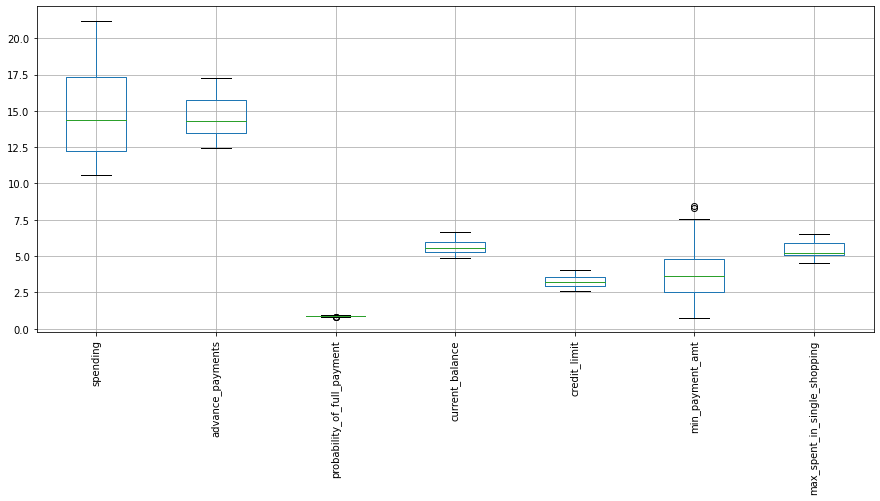

In [ ]:
df.boxplot(figsize=(15,6))
plt.xticks(rotation=90)
plt.show()

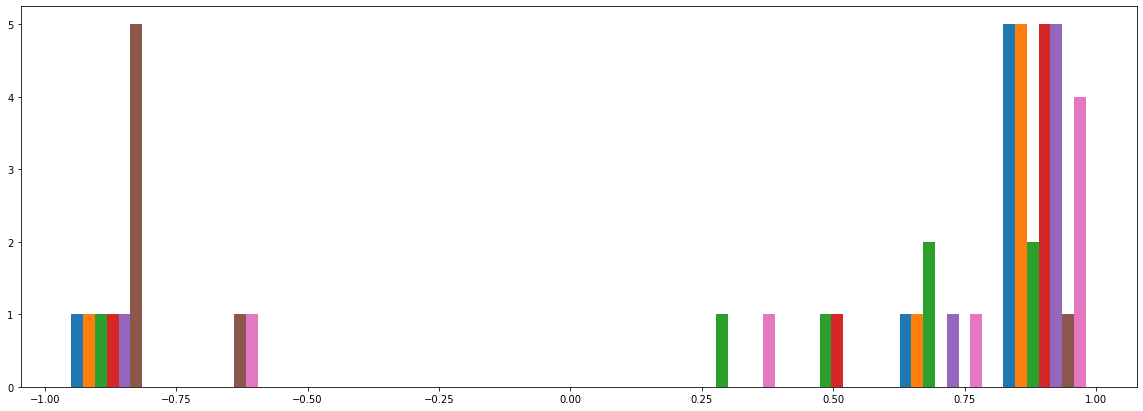

In [ ]:
fig, axs = plt.subplots(1, 1,
                        figsize =(20, 7),
    
                        tight_layout = False)
 
axs.hist(df)
 
# Show plot
plt.show()

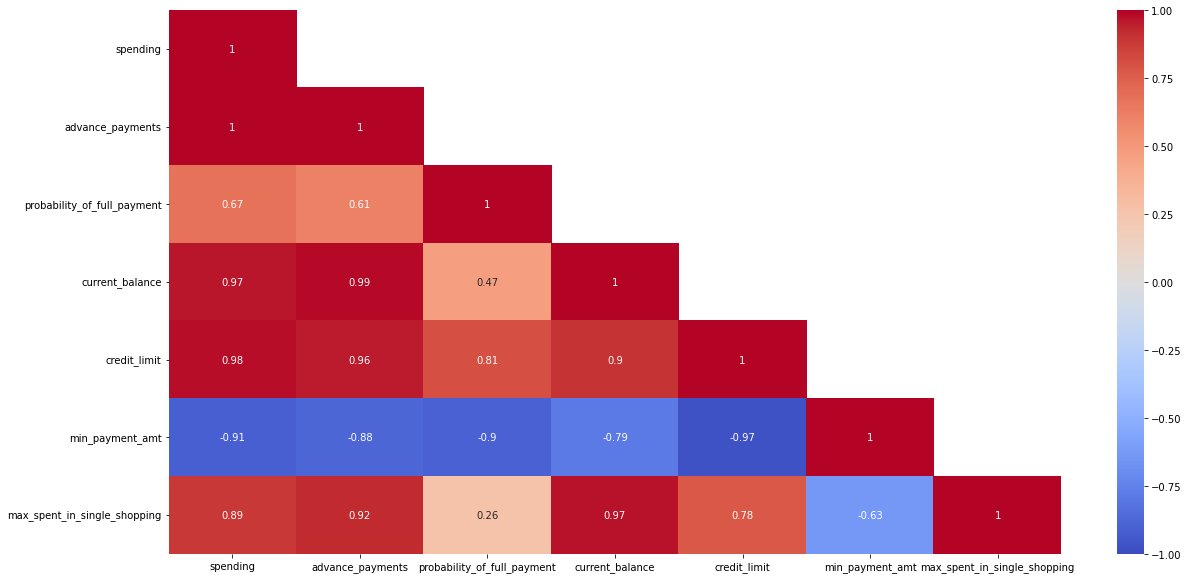

In [ ]:
## correlation map
plt.figure(figsize=(20 ,10))
mask = np.array(df)
mask[np.tril_indices_from(mask)] =False
sns.heatmap(data =df, annot =True, mask =mask,vmax =1, vmin=-1, cmap ='coolwarm');

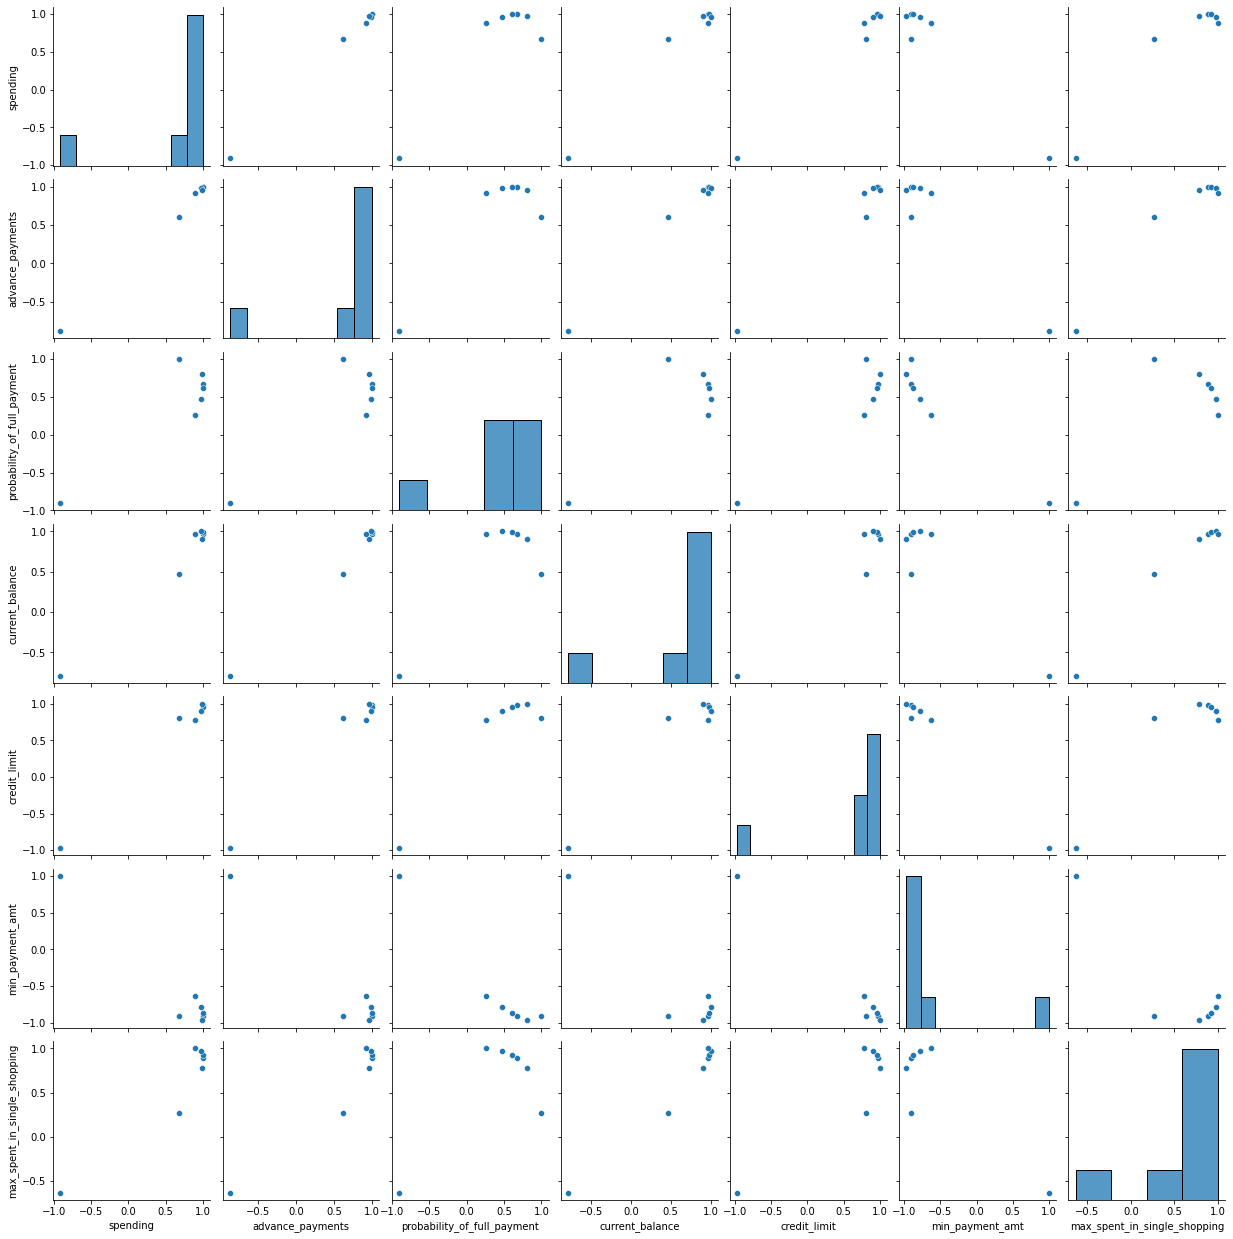

In [ ]:
sns.pairplot(df)
plt.show();

***1.2 Do you think scaling is necessary for clustering in this case? Justify The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling and which method is he/she using to do the scaling. Can also comment on how that method works***

In [ ]:
## Scaling the data
from scipy.stats import zscore
df_num_scaled=df.apply(zscore)
df_num_scaled.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


In [ ]:
# importing the StandardScaler Module
from sklearn.preprocessing import StandardScaler

X = StandardScaler()
scaled_df = pd.DataFrame(X.fit_transform(df.iloc[:,1:7]),columns=df.columns[1:])
scaled_df

,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813
...,...,...,...,...,...,...
205,-0.413929,0.721222,-0.428801,-0.158181,0.190536,-1.366631
206,0.814152,-0.305372,0.675253,0.476084,0.813214,0.789153
207,-0.306472,0.364883,-0.431064,-0.152873,-1.322158,-0.830235
208,0.338271,1.230277,0.182048,0.600814,-0.953484,0.071238


***1.3 Apply hierarchical clustering to scaled data (3 pts). Identify the number of optimum clusters using Dendrogram and briefly describe them (4). Students are expected to apply hierarchical clustering. It can be obtained via Fclusters or Agglomerative Clustering. Report should talk about the used criterion, affinity and linkage. Report must contain a Dendrogram and a logical reason behind choosing the optimum number of clusters and Inferences on the dendrogram. Customer segmentation can be visualized using limited features or whole data but it should be clear, correct and logical. Use appropriate plots to visualize the clusters***

In [ ]:
df.iloc[:,1:5].describe() 

,advance_payments,probability_of_full_payment,current_balance,credit_limit
count,210.000000,210.000000,210.000000,210.000000
mean,14.559286,0.870999,5.628533,3.258605
std,1.305959,0.023629,0.443063,0.377714
min,12.410000,0.808100,4.899000,2.630000
25%,13.450000,0.856900,5.262250,2.944000
50%,14.320000,0.873450,5.523500,3.237000
75%,15.715000,0.887775,5.979750,3.561750
max,17.250000,0.918300,6.675000,4.033000


In [ ]:
df = df.iloc[:, 1:5]

In [ ]:
df.head()

,advance_payments,probability_of_full_payment,current_balance,credit_limit
0,16.92,0.8752,6.675,3.763
1,14.89,0.9064,5.363,3.582
2,16.42,0.8829,6.248,3.755
3,12.96,0.8099,5.278,2.641
4,15.86,0.8992,5.890,3.694


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage


In [ ]:
wardlink = linkage(df, method = 'ward')

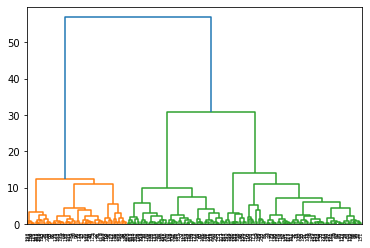

In [ ]:
dend = dendrogram(wardlink)

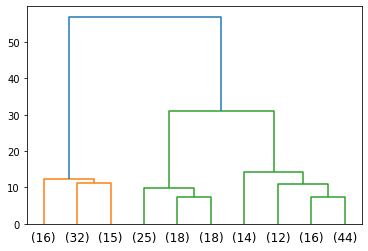

In [ ]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [ ]:
from scipy.cluster.hierarchy import fcluster

In [ ]:
#method 1
clusters = fcluster(wardlink, 3, criterion='maxclust')
clusters

array([1, 2, 1, 3, 1, 3, 3, 2, 1, 3, 1, 2, 3, 1, 3, 3, 2, 3, 3, 3, 3, 3,
       1, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 1,
       3, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 3, 1, 2, 3, 3, 2, 2, 1,
       1, 2, 1, 3, 2, 3, 1, 1, 3, 1, 2, 3, 1, 2, 2, 3, 2, 1, 3, 2, 2, 2,
       1, 3, 3, 1, 2, 3, 3, 1, 1, 1, 3, 1, 3, 1, 2, 1, 2, 1, 1, 3, 3, 1,
       2, 2, 1, 3, 3, 1, 2, 3, 3, 1, 3, 3, 3, 3, 2, 2, 1, 3, 2, 2, 3, 2,
       3, 1, 3, 1, 1, 3, 1, 2, 2, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 2, 2,
       3, 2, 3, 3, 2, 1, 1, 3, 1, 1, 1, 3, 2, 2, 3, 3, 2, 3, 2, 1, 1, 1,
       2, 3, 2, 3, 2, 2, 3, 2, 2, 1, 3, 2, 3, 3, 3, 2, 3, 1, 2, 1, 1, 3,
       1, 3, 2, 2, 2, 3, 1, 2, 1, 2, 2, 2], dtype=int32)

In [ ]:
# Method 2

clusters = fcluster(wardlink, 23, criterion='distance')
clusters

array([1, 2, 1, 3, 1, 3, 3, 2, 1, 3, 1, 2, 3, 1, 3, 3, 2, 3, 3, 3, 3, 3,
       1, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 1,
       3, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 3, 1, 2, 3, 3, 2, 2, 1,
       1, 2, 1, 3, 2, 3, 1, 1, 3, 1, 2, 3, 1, 2, 2, 3, 2, 1, 3, 2, 2, 2,
       1, 3, 3, 1, 2, 3, 3, 1, 1, 1, 3, 1, 3, 1, 2, 1, 2, 1, 1, 3, 3, 1,
       2, 2, 1, 3, 3, 1, 2, 3, 3, 1, 3, 3, 3, 3, 2, 2, 1, 3, 2, 2, 3, 2,
       3, 1, 3, 1, 1, 3, 1, 2, 2, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 2, 2,
       3, 2, 3, 3, 2, 1, 1, 3, 1, 1, 1, 3, 2, 2, 3, 3, 2, 3, 2, 1, 1, 1,
       2, 3, 2, 3, 2, 2, 3, 2, 2, 1, 3, 2, 3, 3, 3, 2, 3, 1, 2, 1, 1, 3,
       1, 3, 2, 2, 2, 3, 1, 2, 1, 2, 2, 2], dtype=int32)

In [ ]:
df['clusters'] = clusters

In [ ]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,3
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [ ]:
df.to_csv('hc.csv')

***1.4 Apply K-Means clustering on scaled data and determine optimum clusters (2 pts). Apply elbow curve and silhouette score (3 pts). Interpret the inferences from the model (2.5 pts). K-means clustering code application with different number of clusters. Calculation of WSS(inertia for each value of k) Elbow Method must be applied and visualized with different values of K. Reasoning behind the selection of the optimal value of K must be explained properly. Silhouette Score must be calculated for the same values of K taken above and commented on. Report must contain logical and correct explanations for choosing the optimum clusters using both elbow method and silhouette scores. Append cluster labels obtained from K-means clustering into the original data frame. Customer Segmentation can be visualized using appropriate graphs.***

In [ ]:
# Create K Means cluster and store the result in the object k_means
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters = 2,random_state=1)



In [ ]:
k_means.fit(df)

KMeans(n_clusters=2, random_state=1)

In [ ]:
# Get the labels
k_means.labels_

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1], dtype=int32)

In [ ]:
k_means.inertia_

1011.712345315119

In [ ]:
k_means = KMeans(n_clusters = 1,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

1259.9999999999998

In [ ]:
k_means = KMeans(n_clusters = 3, random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

398.47257138104794

In [ ]:
k_means = KMeans(n_clusters = 4, random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

349.74033704424596

In [ ]:
k_means = KMeans(n_clusters = 5, random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

308.6442514797732

In [ ]:
k_means = KMeans(n_clusters = 6, random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

275.11057239157833

***Calculating WSS for other values of K - Elbow Method***

In [ ]:
wss = []

In [ ]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [ ]:
wss

[1259.9999999999998,
 607.2643170652891,
 398.47257138104794,
 349.74033704424596,
 308.6442514797732,
 275.11057239157833,
 248.01182685031293,
 225.98173591960415,
 209.29194926314042,
 193.42428405885454]

In [ ]:

a=[1,2,3,4,5,6,7,8,9,10]


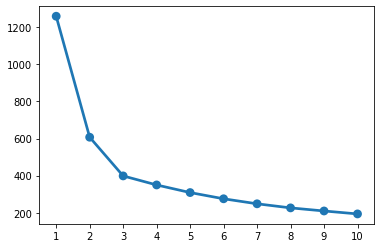

In [ ]:
sns.pointplot(a, wss)

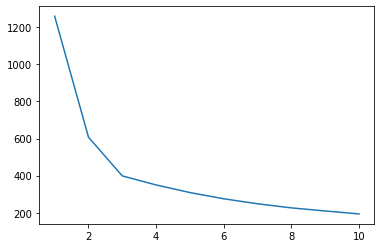

In [ ]:
plt.plot(range(1,11), wss)

***the silhouette score***

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score


In [ ]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

In [ ]:
silhouette_score(scaled_df,labels,random_state=1)

0.4001619756799544

In [ ]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

In [ ]:
silhouette_score(scaled_df,labels,random_state=1)

0.3235236917702016

*silhouette score is better for 3 clusters than for 4 clusters. So, final clusters will be 3*

***1.5 Describe cluster profiles for the clusters defined (2.5 pts). Recommend different promotional strategies for different clusters in context to the business problem in-hand (2.5 pts ). After adding the final clusters to the original dataframe, do the cluster profiling. Divide the data in the finalyzed groups and check their means. Explain each of the group briefly. There should be at least 3-4 Recommendations. Recommendations should be easily understandable and business specific, students should not give any technical suggestions. Full marks will only be allotted if the recommendations are correct and business specific. variable means. Students to explain the profiles and suggest a mechanism to approach each cluster. Any logical explanation is acceptable.***

In [ ]:
# Appending Clusters to the original dataset

df["Clus_kmeans3"] = labels
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans3
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,0
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,0
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,1
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,0


In [ ]:

df.Clus_kmeans3.value_counts().sort_index()


0    50
1    64
2    65
3    31
Name: Clus_kmeans3, dtype: int64

In [ ]:
clust_profile = df.drop(['bank_marketing'],axis=1)
clust_profile = clust_profile.groupby('Clus_kmeans3').mean()
clust_profile['freq'] = df.Clus_kmeans3.value_counts().sort_index()
clust_profile



***END***